The code here is unchanged except for the number of epochs for learning (not to overfit...)

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/home/martin/Uni/Intro_to_Deep_Learning/session02
2.1.2
1.4.1


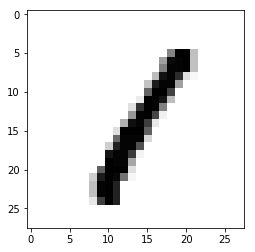

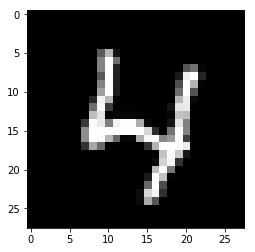

In [2]:
from keras.datasets import mnist

from keras.preprocessing.image import load_img
from keras.preprocessing import image
from scipy import misc

#mimg = load_img('my_numbers/0s/0-02.bmp', target_size=(28,28), grayscale=True)
#mimg = image.img_to_array(mimg)
#mimg = 1-mimg.reshape((28, 28)).astype('float32') / 255.0
#print(type(mimg), mimg.shape)
#plt.imshow(mimg, cmap=plt.cm.binary)
#plt.show()

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print("shapes are:", x_train.shape, y_train.shape)

img1 = x_train[314].reshape(-1, 28*28).astype('float32') / 255.0
img1label = y_train[314]

"""
img=x_train[3]
for r in img:
    for c in r:
        if c:
            print('()', end='', sep='')
        else:
            print('  ', end='', sep='')
    print()
print(y_train[3])"""

img = x_train[3]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

plt.imshow(img1.reshape(28,28), cmap=plt.cm.gray)
plt.show()


x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
Total params: 88,285
Trainable params: 88,285
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=60, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 2s 40us/step - loss: 1.4987 - acc: 0.5015 - val_loss: 0.5783 - val_acc: 0.8126
Epoch 2/60
60000/60000 [==============================] - 2s 37us/step - loss: 0.4396 - acc: 0.8682 - val_loss: 0.3392 - val_acc: 0.8974
Epoch 3/60
60000/60000 [==============================] - 2s 36us/step - loss: 0.3009 - acc: 0.9121 - val_loss: 0.2606 - val_acc: 0.9244
Epoch 4/60
60000/60000 [==============================] - 2s 39us/step - loss: 0.2407 - acc: 0.9296 - val_loss: 0.2360 - val_acc: 0.9305
Epoch 5/60
60000/60000 [==============================] - 2s 38us/step - loss: 0.2033 - acc: 0.9405 - val_loss: 0.1926 - val_acc: 0.9432
Epoch 6/60
60000/60000 [==============================] - 2s 38us/step - loss: 0.1771 - acc: 0.9479 - val_loss: 0.1745 - val_acc: 0.9489
Epoch 7/60
60000/60000 [==============================] - 2s 36us/step - loss: 0.1566 - acc: 0.9543 - val_loss: 0.1662 - val_acc

60000/60000 [==============================] - 2s 36us/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.1402 - val_acc: 0.9718


In [5]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#plt.show()

mimg = load_img('/home/martin/fasdfas.png', target_size=(28,28), grayscale=True)
mimg = image.img_to_array(mimg)
mimg = 1-mimg.reshape((28, 28)).astype('float32') / 255.0

mimg = mimg.reshape((1, 784))
print(mimg.shape)
pred=model.predict(mimg)
print(np.argmax(pred))
print(np.argmax(y_train[0]))



(1, 784)
1
5


In [6]:
from glob import glob
import os


IMG_SIZE = (28, 28)

JKJ

reshaped_data = 1 - data.reshape(-1, 28*28)

right = 0
counter = [0]*10
for p in range(len(answers)):
    ans = model.predict(reshaped_data[p].reshape((1, 784)))
    ans = np.argmax(ans)
    print("{} : {}".format(answers[p], ans))
    if answers[p] == ans:
        right += 1
    counter[ans] += 1
        
print(right / len(answers))
print(counter)


ValueError: invalid literal for int() with base 10: 'f'

In [ ]:
n=61
img=x_train[n].reshape(IMG_SIZE)
for r in img:
    for c in r:
        if c:
            print('{: 2.0f}'.format(c*100), end='', sep='')
        else:
            print('  ', end='', sep='')
    print()
print(np.argmax(y_train[n]))

img=1-data[52]
for r in img:
    for c in r:
        if c:
            print('{: 2.0f}'.format(c*100), end='', sep='')
        else:
            print('  ', end='', sep='')
    print()